In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

In [2]:
#%matplotlib qt

In [3]:
#Definición de unidades
    #Escalas
um=1e-6
mm=1e-3
nm=1e-9
    #Tamaño imagen
N=200
M=200
    #longitud de onda
w_length=632*nm
    #Tamaño de pixel
dx=dy=1*um #equivalencia con el mundo físico

In [4]:
# Método función de transferencia ded Fresnel 
def T_Aprox(T_f,dx_f,dy_f,z_f,wave_length):
    
    #tomamos el contenido freq de la imagen
    T_freq=np.fft.fftshift(np.fft.fft2(T_f))
    
    #definimos el espacio coordenado
    M_f,N_f=np.shape(T_f) #The shape of an array is the number of elements in each dimension
    x=np.arange(-int(M_f/2),int(M_f/2),1) #arreglo desde -la mitad del número de elementos que tenga cada dimensión
    y=np.arange(-int(N_f/2),int(N_f/2),1) #hasta la mitad de número de elementos en cada dimensión, con pasos de a 1.
    X,Y=np.meshgrid(x,y) #Return coordinate matrices from coordinate vectors.
    
    #dimensionando
    fX=X*(1/(M_f*dx_f)) 
    fY=Y*(1/(N_f*dy_f))
    
    k=np.pi/wave_length
    C1=np.exp(1j*k*z_f) #/(1j*wave_length*z_f)#cte 1 e^ikz
    C2=-1j*np.pi*wave_length*z_f #cte 2 la otra 
    
    mat=C1*np.exp(C2*((fX**2)+(fY**2))) # matriz 
    
    freq_p=T_freq*mat
    return freq_p

In [5]:
T=cv2.imread("uno.jpg",cv2.IMREAD_GRAYSCALE)
T=T/np.max(T)
np.shape(T)

(290, 290)

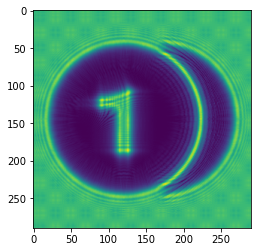

In [6]:
#propagamos
z2=100000*nm
f_prop=T_Aprox(T,dx,dy,z2,w_length)

dodoco_prop=np.fft.ifft2(f_prop)

plt.figure()
plt.imshow(
    np.abs(dodoco_prop)
        )
plt.show()

In [7]:
## Espectro angular

In [23]:
def A_apx(U_f,dx_f,dy_f,z_f,wave_length):
    U_freq=np.fft.fftshift(np.fft.fft2(U_f))
    
    N_f,M_f=np.shape(U_f) #The shape of an array is the number of elements in each dimension
    x=np.arange(-int(M_f/2),int(M_f/2),1) #arreglo desde -la mitad del número de elementos que tenga cada dimensión
    y=np.arange(-int(N_f/2),int(N_f/2),1) #hasta la mitad de número de elementos en cada dimensión, con pasos de a 1.
    X,Y=np.meshgrid(x,y) #Return coordinate matrices from coordinate vectors.
    
     #dimensionando
    fX=X*(1/(M_f*dx_f)) 
    fY=Y*(1/(N_f*dy_f))
    
    k= 2*np.pi/wave_length
    C1 = 1j*z_f*k

    matriz = np.exp(C1*np.sqrt(1-(wave_length**2)*((fX**2)+(fY**2))))

    freq_p = U_freq*matriz
    plt.figure()
    plt.imshow(np.angle(
    matriz))
        
    plt.show()
    
    return freq_p

In [24]:
U=cv2.imread("uno.jpg",cv2.IMREAD_GRAYSCALE)
U=U/np.max(T)
np.shape(U)

(290, 290)

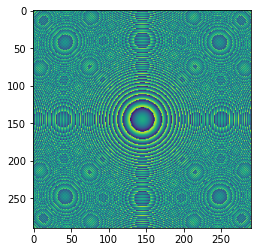

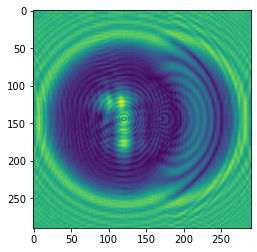

In [25]:
z2=0.615*mm
A_prop=A_apx(U,dx,dy,z2,w_length)

dodoco_prop=np.fft.ifft2(A_prop)

plt.figure()
plt.imshow(
    np.abs(dodoco_prop)
        )
plt.show()

In [26]:
from PIL import Image
import numpy as np

w, h = 512, 512
data = np.zeros((h, w, 3), dtype=np.uint8)
data[0:256, 0:256] = [255, 0, 0] # red patch in upper left
img = Image.fromarray(data, 'RGB')
img.save('my.png')
img.show()

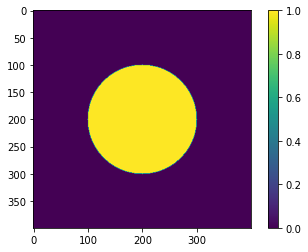

In [27]:
mask2 = np.zeros((400,400),dtype="uint8")
coordy=int((400,400)[0]/2)
coordx=int((400,400)[1]/2)

cv2.circle(mask2,(coordy,coordx),100,1,-1)
plt.figure()
plt.imshow(mask2)
plt.colorbar()
plt.show()

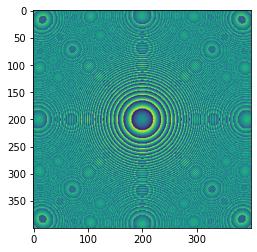

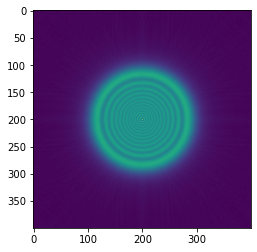

In [28]:
z2=632*um
A_prop=A_apx(mask2,dx,dy,z2,w_length)

dodoco_prop=np.fft.ifft2(A_prop)

plt.figure()
plt.imshow(
    np.abs(dodoco_prop)
        )
plt.show()

(400, 400)

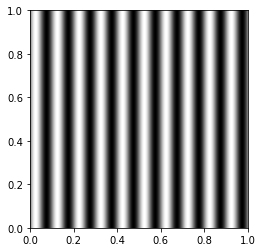

In [31]:
hW, hH = 200, 200    
hFrec = 10     

# Crea una malla en el cuadrado de dimensiones [0,1)x[0,1)
x = np.linspace( 0, 2*hW/(2*hW ), 2*hW)     # columnas (Anchura)
y = np.linspace( 0, 2*hH/(2*hH ), 2*hH)     # filas    (Altura)

[X,Y] = np.meshgrid(x,y)
A = np.sin(hFrec*2*np.pi*X)

plt.imshow(A, extent=[0,1,0,1], cmap ='gray');
H,W = np.shape(A)
np.shape(A) # Dimensiones de la imagen A

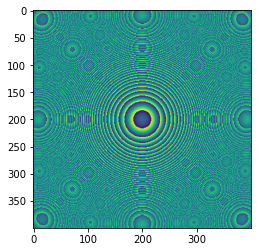

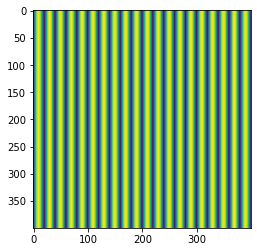

In [32]:
z2=630*um
A_prop=A_apx(A,dx,dy,z2,w_length)

dodoco_prop=np.fft.ifft2(A_prop)

plt.figure()
plt.imshow(
    np.abs(dodoco_prop)
        )
plt.show()

In [18]:
## Fresnel 

In [27]:
#Transformada de Fresnel
def T_fre(U_f,dx_f,dy_f,z_f,wave_length):
    
    
    N_f,M_f=np.shape(U_f) #The shape of an array is the number of elements in each dimension
    x=np.arange(-int(M_f/2),int(M_f/2),1) #arreglo desde -la mitad del número de elementos que tenga cada dimensión
    y=np.arange(-int(N_f/2),int(N_f/2),1) #hasta la mitad de número de elementos en cada dimensión, con pasos de a 1.
    X,Y=np.meshgrid(x,y) #Return coordinate matrices from coordinate vectors.
    
     #dimensionando
    fX=X*(wave_length/(M_f*dx_f)) #hacen las veces de x0 y y0
    fY=Y*(wave_length/(N_f*dy_f))
    Xs=X*dx_f #NO SÉ
    Ys=Y*dy_f
    
    k= 2*np.pi/wave_length
    C1 = -1j*np.exp(1j*z_f*k)/(wave_length*z_f)
    C2= np.exp((1j*k*z_f/(2*z_f))*((fX*wave_length*z_f)**2+(fY*wave_length*z_f)**2))

    matriz = C1*C2*np.fft.fftshift(np.fft.fft2(U_f*np.exp((-1j*k/(2*z_f))*(Xs**2)+(Ys**2)*Xs*Ys)))

    freq_p = matriz
      plt.figure()
    plt.imshow(np.angle(
    matriz))
        
    plt.show()
    return freq_p

<ipython-input-36-2d31021f43ed>:6: RuntimeWarning: divide by zero encountered in log
  plt.imshow( np.log(


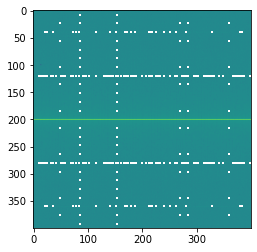

In [36]:
z2=0.130*um
T_prop=T_fre(A,dx,dy,z2,w_length)


plt.figure()
plt.imshow( np.log(
    np.abs(T_prop)
        ))
plt.show()

ValueError: x and y must have same first dimension, but have shapes (50,) and (0,)

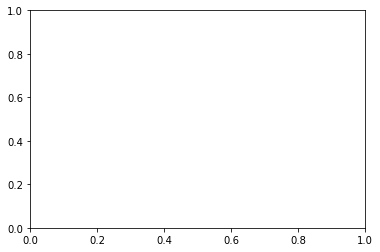

In [62]:
plt.plot(range(-25,25),dodoco_prop[N:M-190,N+190])
plt.show()

In [15]:
from photutils.aperture import CircularAperture

aper = CircularAperture([10., 20.], 3.)
aper = CircularAperture((10., 20.), 3.)


plt.show()